In [1]:
# importing libraries

import pandas as pd
import numpy as np
from pandas import DataFrame, Series 

import re
import string

import nltk
from nltk.corpus import stopwords
import spacy
import os

import gensim
from gensim import corpora

import pyLDAvis
import pyLDAvis.gensim_models

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:

review_data = pd.read_csv("/home/suvam/Reviews.csv")

print(review_data.head(3))
print(len(review_data))

print('Unique Products:')
print(len(review_data.groupby('ProductId')))

print('Unique Users:')
print(len(review_data.groupby('UserId')))


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
568454
Unique Products:
74258
Unique Users:
256059


In [3]:
  # cleaning data
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [4]:
review_data.dropna(axis = 0, how ='any',inplace=True) 

review_data['Text'] = review_data['Text'].apply(clean_text)
review_data['Num_words_text'] = review_data['Text'].apply(lambda x:len(str(x).split())) 

print("{:s}\n{:s}\n".format('Dataset', len('Dataset')*3* "-"))

print(review_data['Score'].value_counts())
print(21 * "-")
print('Total reviews:')
print(len(review_data))
print(21 * "-")

max_review_data_sentence_length  = review_data['Num_words_text'].max()

mask = (review_data['Num_words_text'] < 100) & (review_data['Num_words_text'] >=90)
df_short_reviews = review_data[mask]

df_sampled = df_short_reviews.groupby('Score').apply(lambda x: x.sample(n=200)).reset_index(drop = True)

print('No of Short reviews: ')
print(len(df_short_reviews))

Dataset
---------------------

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64
---------------------
Total reviews:
568411
---------------------
No of Short reviews: 
11815


In [5]:
 #removing stopwords
stop_words = stopwords.words('english')

def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text


df_sampled['Text']=df_sampled['Text'].apply(remove_stopwords)
#print(df_sampled['Text']

In [6]:
 # lemmas for words that represent noun and adjective as they tolk about the topics more
 # compare to other parts of speech 
nlp = spacy.load("en_core_web_md", disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [7]:
# making a list of words
text_list=df_sampled['Text'].tolist()
print(text_list[8])
print(134 * "-")

tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[8])

known better order chocolate time year shippers refuse ship chocolate florida summer prime member thought might packaged well enough good shape nothing package protect heat delightful little bites chocolate covered pomegranate turned pound block chocolate little bits gummy candy discs made pomegranate juice enough give kick real pomegranate juice even shelf store tell feeling package melted together wouldnt spend much money little pomegranate
--------------------------------------------------------------------------------------------------------------------------------------
['well', 'order', 'chocolate', 'time', 'year', 'shipper', 'ship', 'member', 'enough', 'good', 'shape', 'package', 'heat', 'delightful', 'little', 'bite', 'chocolate', 'pomegranate', 'pound', 'block', 'chocolate', 'little', 'bit', 'gummy', 'candy', 'disc', 'pomegranate', 'juice', 'real', 'pomegranate', 'juice', 'shelf', 'store', 'package', 'much', 'money', 'little', 'pomegranate']


In [8]:
# creating a document term matrix
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]
print(doc_term_matrix[1])

[(10, 4), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 3), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 2), (53, 1), (54, 1)]


In [9]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Building LDA model
lda_model = LDA(
    corpus=doc_term_matrix,
    id2word=dictionary,
    num_topics=10,
    random_state=100,
    chunksize=1000,
    passes=50,
    iterations=100
)

In [10]:

# will print 10 topics from 10ok reviews containing 21 to 99 words for each review
lda_model.print_topics()

[(0,
  '0.019*"treat" + 0.016*"good" + 0.013*"water" + 0.011*"flavor" + 0.011*"product" + 0.009*"dog" + 0.009*"food" + 0.009*"small" + 0.007*"coconut" + 0.007*"time"'),
 (1,
  '0.021*"product" + 0.020*"food" + 0.014*"hair" + 0.010*"dog" + 0.010*"time" + 0.009*"taste" + 0.007*"water" + 0.007*"good" + 0.006*"shampoo" + 0.006*"flavor"'),
 (2,
  '0.026*"food" + 0.024*"cookie" + 0.020*"product" + 0.010*"ingredient" + 0.010*"good" + 0.009*"time" + 0.008*"chicken" + 0.008*"great" + 0.005*"quality" + 0.005*"grain"'),
 (3,
  '0.053*"chip" + 0.016*"salt" + 0.012*"good" + 0.012*"potato" + 0.010*"flavor" + 0.009*"taste" + 0.007*"food" + 0.007*"garlic" + 0.005*"bag" + 0.005*"thing"'),
 (4,
  '0.012*"chocolate" + 0.009*"granola" + 0.008*"good" + 0.008*"meat" + 0.007*"amount" + 0.007*"little" + 0.007*"steak" + 0.006*"product" + 0.006*"brand" + 0.006*"food"'),
 (5,
  '0.009*"price" + 0.009*"energy" + 0.009*"taste" + 0.009*"product" + 0.009*"time" + 0.007*"protein" + 0.006*"drink" + 0.006*"great" + 0.0

In [11]:
# Visualizing the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/home/suvam/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.183246  0.055186       1        1  16.539036
6     -0.013916 -0.049679       2        1  13.784876
8      0.054908  0.051247       3        1  12.065380
2     -0.047879 -0.067416       4        1  12.012665
1     -0.010969 -0.106769       5        1  11.610640
0     -0.004803 -0.051449       6        1  11.069862
3     -0.113709  0.138141       7        1   6.469324
9      0.006868 -0.035038       8        1   6.139006
5     -0.013593  0.012261       9        1   5.657514
4     -0.040152  0.053518      10        1   4.651696, topic_info=       Term        Freq       Total Category  logprob  loglift
438  coffee  535.000000  535.000000  Default  30.0000  30.0000
555    chip  180.000000  180.000000  Default  29.0000  29.0000
999  cookie  133.000000  133.000000  Default  28.0000  28.0000
9    flavor  486.000000  486.000000  Default  27.0000  27.0000
84    treat  124.000000  124.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
112   drink    7.566314  147.084290  Topic10  -5.5596   0.1006
9    flavor    8.159066  486.275460  Topic10  -5.4841  -1.0197
555    chip    7.402277  180.548284  Topic10  -5.5815  -0.1263
3      case    6.714620   93.600972  Topic10  -5.6790   0.4332
751   thing    6.776480  168.134712  Topic10  -5.6698  -0.1434

[769 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2298      3  0.114579   ability
2298      5  0.687472   ability
2298     10  0.114579   ability
2372      2  0.843659  abnormal
1014      3  0.847331   acidity
...     ...       ...       ...
54        9  0.022690      year
54       10  0.030254      year
5200      2  0.843642     yesbr
3820      2  0.155699    yogurt
3820     10  0.778495    yogurt

[1942 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 9, 3, 2, 1, 4, 10, 6, 5])

In [12]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.072515142278603

Coherence Score:  0.23059305050677836


In [13]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [14]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)

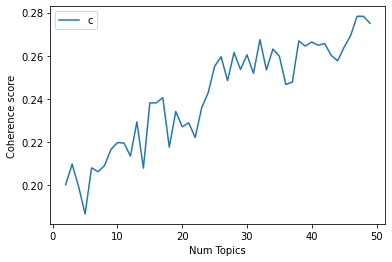

In [15]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [16]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2003
Num Topics = 3  has Coherence Value of 0.2098
Num Topics = 4  has Coherence Value of 0.1994
Num Topics = 5  has Coherence Value of 0.1868
Num Topics = 6  has Coherence Value of 0.2081
Num Topics = 7  has Coherence Value of 0.2063
Num Topics = 8  has Coherence Value of 0.2092
Num Topics = 9  has Coherence Value of 0.2167
Num Topics = 10  has Coherence Value of 0.2198
Num Topics = 11  has Coherence Value of 0.2196
Num Topics = 12  has Coherence Value of 0.2136
Num Topics = 13  has Coherence Value of 0.2294
Num Topics = 14  has Coherence Value of 0.208
Num Topics = 15  has Coherence Value of 0.2382
Num Topics = 16  has Coherence Value of 0.2382
Num Topics = 17  has Coherence Value of 0.2406
Num Topics = 18  has Coherence Value of 0.2177
Num Topics = 19  has Coherence Value of 0.2342
Num Topics = 20  has Coherence Value of 0.2271
Num Topics = 21  has Coherence Value of 0.229
Num Topics = 22  has Coherence Value of 0.2222
Num Topics = 23  has Co

In [17]:
# Select the model and print the topics
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.014*"food" + 0.012*"good" + 0.012*"time" + 0.011*"product" + 0.011*"little" + 0.007*"water" + 0.006*"stuff" + 0.006*"flavor" + 0.006*"great" + 0.005*"cat"'),
 (1,
  '0.014*"food" + 0.011*"taste" + 0.011*"product" + 0.009*"ingredient" + 0.009*"flavor" + 0.008*"good" + 0.006*"sugar" + 0.006*"corn" + 0.005*"much" + 0.005*"pumpkin"'),
 (2,
  '0.012*"good" + 0.011*"cookie" + 0.009*"flavor" + 0.008*"product" + 0.008*"food" + 0.007*"taste" + 0.007*"brand" + 0.006*"great" + 0.006*"coffee" + 0.006*"time"'),
 (3,
  '0.014*"product" + 0.013*"taste" + 0.013*"flavor" + 0.012*"good" + 0.012*"food" + 0.010*"time" + 0.008*"sweet" + 0.007*"ingredient" + 0.007*"treat" + 0.006*"chocolate"'),
 (4,
  '0.029*"product" + 0.013*"coffee" + 0.010*"chip" + 0.009*"cookie" + 0.008*"great" + 0.007*"good" + 0.007*"flavor" + 0.006*"ginger" + 0.006*"company" + 0.005*"time"'),
 (5,
  '0.022*"flavor" + 0.017*"good" + 0.013*"coffee" + 0.012*"product" + 0.011*"water" + 0.010*"food" + 0.010*"chip" + 0.009*"sugar"

In [19]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

/home/suvam/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.011625  0.030767       1        1  18.293173
3     -0.025524  0.002990       2        1  17.667709
6      0.027103  0.056441       3        1  14.130844
4      0.060511 -0.052678       4        1   9.380286
0     -0.066653  0.010464       5        1   9.274621
2      0.028266 -0.054052       6        1   9.210251
7      0.060665  0.049916       7        1   8.475001
8     -0.006581 -0.027059       8        1   7.879873
1     -0.066162 -0.016790       9        1   5.688243, topic_info=         Term        Freq       Total Category  logprob  loglift
438    coffee  524.000000  524.000000  Default  30.0000  30.0000
19    product  565.000000  565.000000  Default  29.0000  29.0000
999    cookie  131.000000  131.000000  Default  28.0000  28.0000
10       food  479.000000  479.000000  Default  27.0000  27.0000
1559    sauce   77.000000   77.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
220    little    8.603435  211.554314   Topic9  -5.6323  -0.3356
158     price    7.937395  162.486512   Topic9  -5.7129  -0.1522
51      store    7.625203  146.530506   Topic9  -5.7530  -0.0890
30      brand    7.611310  159.922517   Topic9  -5.7548  -0.1783
249    review    7.411712  134.118505   Topic9  -5.7814  -0.0289

[727 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
5934      3  0.733185   32ounce
961       4  0.763115      64fl
2372      3  0.821848  abnormal
1091      1  0.067247      acid
1091      3  0.134493      acid
...     ...       ...       ...
54        9  0.038125      year
1687      3  0.126211     yeast
1687      4  0.378634     yeast
1687      6  0.504846     yeast
3803      7  0.768773     yuban

[1935 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 7, 5, 1, 3, 8, 9, 2])

/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
